In [1]:
!pip install seaborn
import pandas as pd
import plotly.express as px
# Cargar los datos desde el archivo CSV
datos_ventas = pd.read_csv('/content/United-States-NICS-2024-05.csv')


In [4]:
# Convertir la columna 'month' a tipo datetime
datos_ventas['month'] = pd.to_datetime(datos_ventas['month'])

# Extraer el año de la columna 'month'
datos_ventas['Year'] = datos_ventas['month'].dt.year
# Filtrar los datos para los Estados Unidos
datos_usa = datos_ventas[datos_ventas['state'] == 'United States']
# Filtrar los datos para incluir solo hasta el año 2023
datos_usa = datos_usa[datos_usa['year'] <= 2023]
# Agrupar los datos por año y sumar las ventas ajustadas totales
ventas_anuales = datos_usa.groupby('year')['total_adjusted'].sum().reset_index()
# Crear el gráfico de líneas interactivo
fig = px.line(ventas_anuales, x='year', y='total_adjusted', title='Ventas Totales de Armas Ajustadas por Año en Estados Unidos (Hasta 2023)', labels={'total_adjusted':'Ventas Totales Ajustadas', 'year':'Año'})
# Mostrar la visualización
fig.show()
datos_usa = datos_usa[datos_usa['year'] <= 2023]
# Agrupar los datos por año y sumar las ventas ajustadas totales
ventas_anuales = datos_usa.groupby('Year')['total_adjusted'].sum().reset_index()



In [5]:
!pip install seaborn
# Cargar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('/content/incidents-new.csv')


<ipython-input-7-cd860075f0fa>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



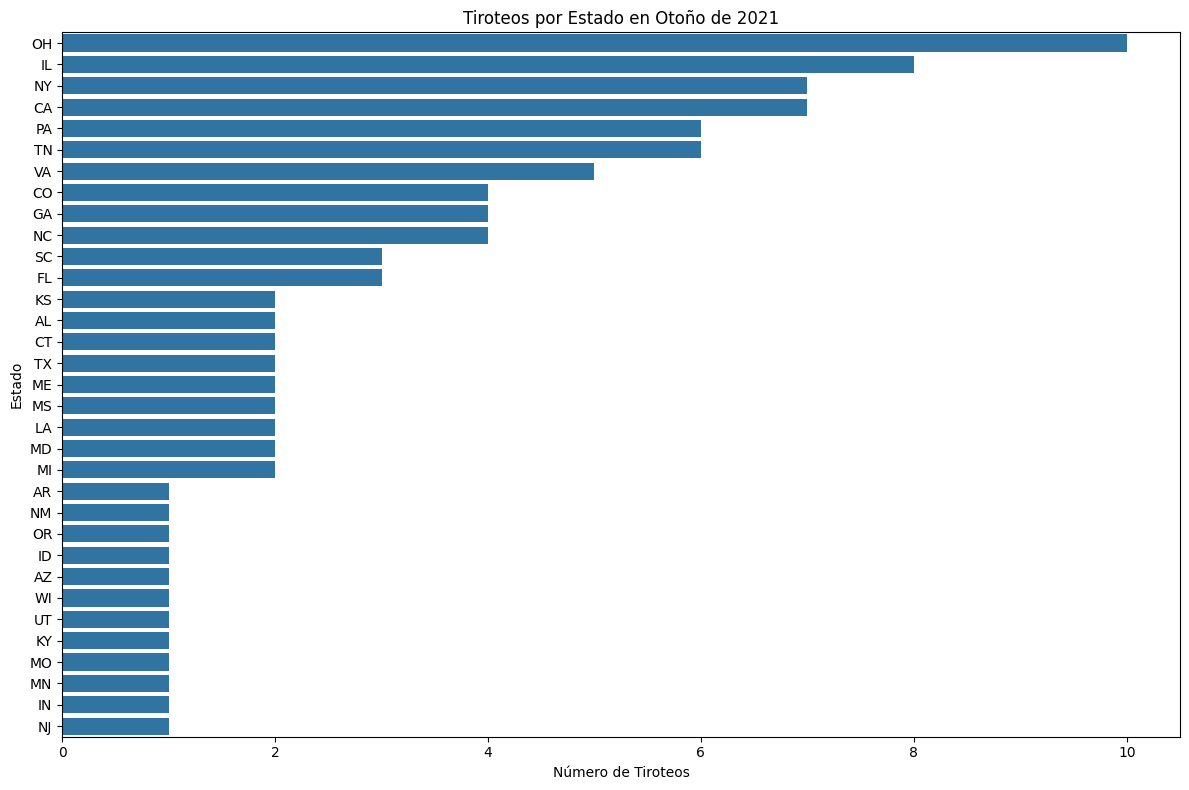

In [7]:
#  Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])
# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'
# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)
# Filtrar los datos para incidentes en otoño de 2021
datos_otono_2021 = datos[(datos['Year'] == 2021) & (datos['Season'] == 'Fall')]
# Crear y mostrar la visualización
plt.figure(figsize=(12, 8))
sns.countplot(data=datos_otono_2021, y='State', order=datos_otono_2021['State'].value_counts().index)
plt.title('Tiroteos por Estado en Otoño de 2021')
plt.xlabel('Número de Tiroteos')
plt.ylabel('Estado')
plt.tight_layout()
# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_otono_2021.png')
plt.show()



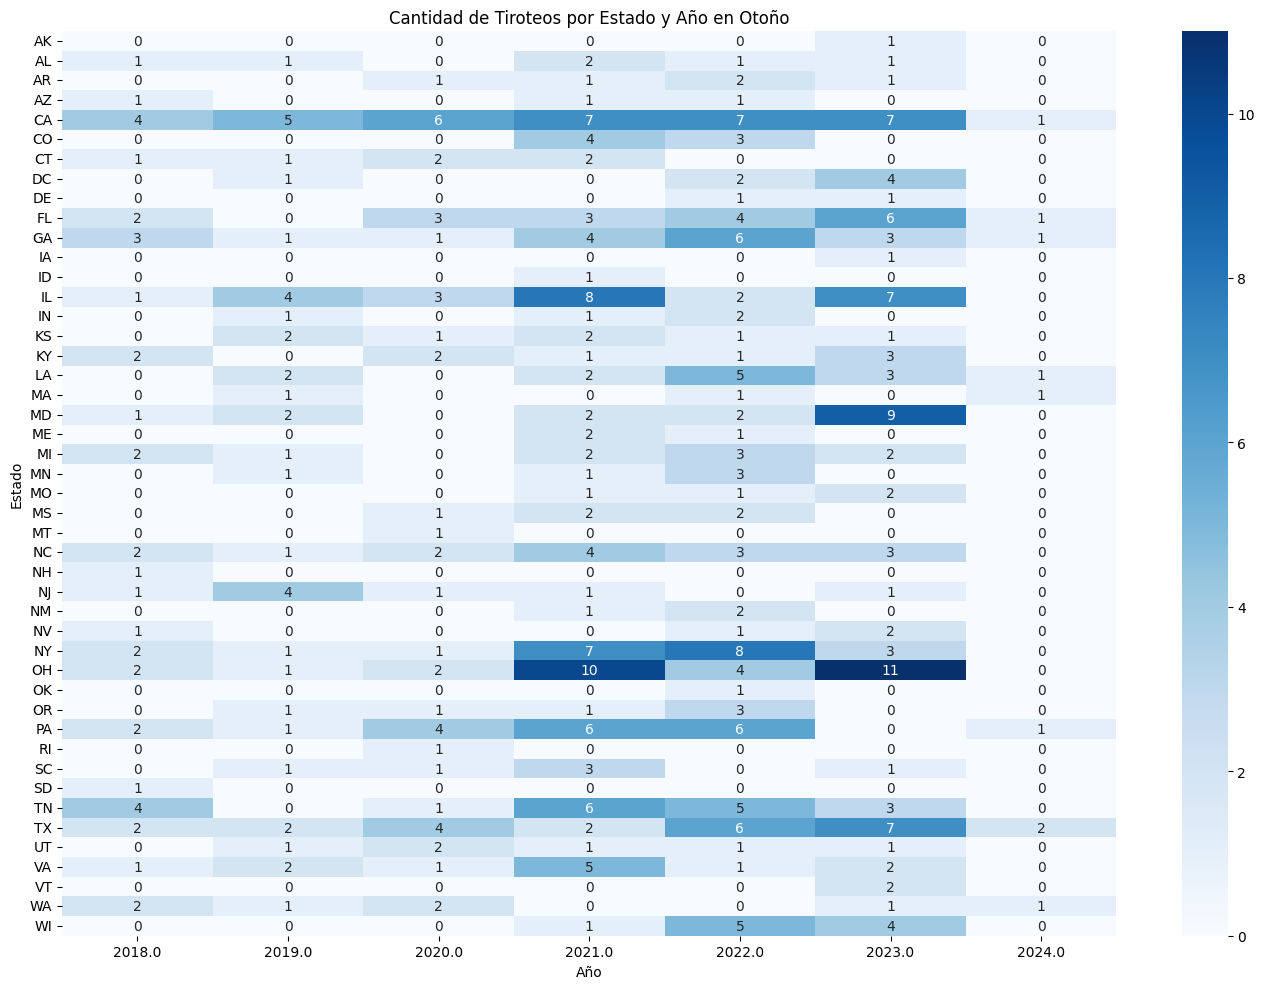

In [8]:
# Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])
# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'
# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)
# Paso 6: Filtrar los datos para incidentes en otoño
datos_otono = datos[datos['Season'] == 'Fall']
# Paso 7: Crear una tabla pivot
tabla_pivot = datos_otono.pivot_table(index='State', columns='Year', aggfunc='size', fill_value=0)
# Paso 8: Crear y mostrar la visualización
plt.figure(figsize=(14, 10))
sns.heatmap(tabla_pivot, annot=True, fmt="d", cmap="Blues")
plt.title('Cantidad de Tiroteos por Estado y Año en Otoño')
plt.xlabel('Año')
plt.ylabel('Estado')
plt.tight_layout()
# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_estado_ano_otono.png')
plt.show()


In [9]:
import pandas as pd
import plotly.express as px
# Cargar los datos desde el archivo CSV
archivo_csv = '/content/nics-latest.csv'


In [11]:
datos_ventas = pd.read_csv(archivo_csv)
# Filtrar los datos para el año 2020 y excluir el estado "Estados Unidos"
datos_2020 = datos_ventas[(datos_ventas['year'] == 2020) & (datos_ventas['state'] != 'United States')]
# Agrupar los datos por estado y sumar las ventas totales ajustadas para 2020
ventas_estados_2020 = datos_2020.groupby('state')['total_adjusted'].sum().reset_index()
# Seleccionar los 10 estados con las mayores ventas totales ajustadas en 2020
top_10_estados_2020 = ventas_estados_2020.nlargest(10, 'total_adjusted')
# Crear el gráfico de barras horizontales
fig2 = px.bar(top_10_estados_2020, x='total_adjusted', y='state', title='Top 10 Estados con Mayor Venta de Armas en 2020',
              labels={'total_adjusted': 'Ventas Totales Ajustadas', 'state': 'Estado'}, orientation='h')

# Mostrar la visualización 2
fig2.show()
